<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/mobilenet1119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow
import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

In [ ]:
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [ ]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
s2 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_S2_裁/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_S2_裁/*.JPG") 

gp = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_GP_125_裁/*") 

krv = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_KRV_裁/*")

fiddle = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_JET_SR_125_裁/*")

vivo = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_活力_125_裁/*")

famous = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_新名流125_裁/*")

drg = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_DRG_裁/*") 

duke = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_新迪爵_125 _裁/*")

limi = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_六代勁戰_125_裁/*")



force = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_FORCE_裁/*")

viva = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_S3_裁/*")

like = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_LIKE_125_裁/*")

many = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_MANY_125_裁/*")

bws = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_BWS_125_裁/*")

sl = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_JET_SL_125_裁/*")

axiz = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_勁豪_125_裁/*")

jog = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_JOG_125_裁/*")

In [ ]:
print(len(trans))

20


In [ ]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6 + force + viva + s3 + like + many + bws + sl + axiz + jog,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6) + [11] * len(force) + [12] * len(viva) + [13] * len(s3)
     + [14] * len(like) + [15] * len(many) + [16] * len(bws) + [17] * len(sl) + [18] * len(axiz) + [19] * len(jog)
})
df
#trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


,path,ans
0,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/G...,0
1,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/G...,0
2,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/G...,0
3,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/G...,0
4,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/G...,0
...,...,...
7974,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/Y...,19
7975,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/Y...,19
7976,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/Y...,19
7977,/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/Y...,19


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[321 574 336 790 316 477 618 377 506 315 788 358 182 314 276 354 142 212
 511 212]


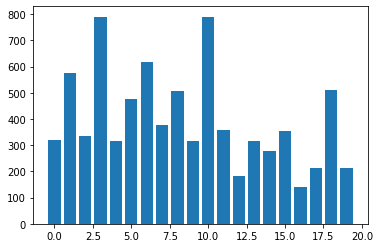

In [ ]:
list_ = [i for n, i in enumerate(df["ans"])]
cls, count = np.unique(list_, return_counts=True)
plt.bar(cls, count)
print(cls, count, sep="\n")
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_FORCE_裁/IMG_2430.JPG
[[[-0.60784316 -0.5921569  -0.6313726 ]
  [-0.5137255  -0.4823529  -0.5686275 ]
  [-0.38039213 -0.3098039  -0.4823529 ]
  ...
  [ 0.15294123  0.12941182 -0.01960784]
  [ 0.11372554  0.10588241 -0.04313725]
  [ 0.12156868  0.10588241 -0.05098039]]

 [[-0.5294118  -0.4980392  -0.56078434]
  [-0.54509807 -0.5058824  -0.5921569 ]
  [-0.4823529  -0.41176468 -0.56078434]
  ...
  [ 0.17647064  0.13725495 -0.01960784]
  [ 0.13725495  0.10588241 -0.04313725]
  [ 0.1686275   0.12941182 -0.02745098]]

 [[-0.24705881 -0.09019607 -0.3960784 ]
  [-0.34117645 -0.23921567 -0.42745095]
  [-0.19215685 -0.1607843  -0.30196077]
  ...
  [ 0.19215691  0.15294123 -0.00392157]
  [ 0.16078436  0.12156868 -0.02745098]
  [ 0.15294123  0.10588241 -0.05098039]]

 ...

 [[-0.9137255  -0.85882354 -0.90588236]
  [-0.9137255  -0.85882354 -0.90588236]
  [-0.8039216  -0.70980394 -0.8039216 ]
  ...
  [ 0.5529412   0.7176471   0.78039217]
  [ 0.59215

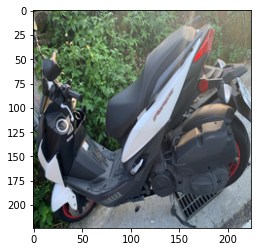

In [ ]:
p = df["path"]

idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
# idx
path = p[idx]
# print(path.shape)

# img = cv2.imread(path)
# plt.imshow(img[:, :, ::-1])

img = Image.open(path).resize((224, 224)).convert("RGB")
img_np = np.array(img)
print(path)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)
# print(img)

In [ ]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [ ]:
base_model = MobileNet(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation="relu")(x)
predictions = layers.Dense(20, activation='softmax')(x)

# Freeze layers 凍結層 把遷移來的卷積的參數固定
for l in base_model.layers:
  l.trainable = False

# 把卷積和後面的分類層合在一起
model = models.Model(base_model.input, predictions)
model.summary()
# base_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

In [ ]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [ ]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[ 1.          1.          1.        ]
   [ 0.88235295  0.88235295  0.7176471 ]
   [ 0.81960785  0.81960785  0.45098042]
   ...
   [ 0.85882354  0.8352941   0.16078436]
   [ 0.84313726  0.8117647   0.5921569 ]
   [ 0.5764706   0.5058824   0.21568632]]

  [[ 1.          1.          1.        ]
   [ 0.8039216   0.79607844  0.62352943]
   [ 0.5921569   0.58431375  0.1686275 ]
   ...
   [ 0.7647059   0.75686276  0.10588241]
   [ 0.7647059   0.69411767  0.30196083]
   [ 0.58431375  0.4431373   0.15294123]]

  [[ 1.          1.          1.        ]
   [ 0.8980392   0.8980392   0.8117647 ]
   [ 0.6784314   0.654902    0.4431373 ]
   ...
   [ 0.8352941   0.7647059   0.23921573]
   [ 0.8352941   0.78039217  0.45098042]
   [ 0.7411765   0.6313726   0.3803922 ]]

  ...

  [[ 0.32549024  0.28627455  0.23921573]
   [ 0.34901965  0.30980396  0.26274514]
   [ 0.41176474  0.38823533  0.34901965]
   ...
   [ 0.5764706   0.54509807  0.52156866]
   [ 0.5294118   0.5058824   0.47450984]
   [ 0.5294118  

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7181,)
(798,)
(7181,)
(798,)


In [ ]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import keras
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.99
keras.callbacks.LearningRateScheduler(scheduler)


callbacks = [
             EarlyStopping(patience=12, restore_best_weights=True),
             ModelCheckpoint("/content/1118_mobilenet_all.h5", save_best_only=True),
             LearningRateScheduler(scheduler)
]

model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=500,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/500
20/20 [==============================] - 186s 8s/step - loss: 3.2236 - acc: 0.1525 - val_loss: 2.9391 - val_acc: 0.1667 - lr: 0.0010
Epoch 2/500
20/20 [==============================] - 159s 8s/step - loss: 2.6270 - acc: 0.2375 - val_loss: 2.4248 - val_acc: 0.2833 - lr: 0.0010
Epoch 3/500
20/20 [==============================] - 153s 8s/step - loss: 2.3041 - acc: 0.3125 - val_loss: 2.0721 - val_acc: 0.3667 - lr: 0.0010
Epoch 4/500
20/20 [==============================] - 148s 8s/step - loss: 2.0062 - acc: 0.3975 - val_loss: 2.2808 - val_acc: 0.3833 - lr: 0.0010
Epoch 5/500
20/20 [==============================] - 141s 7s/step - loss: 1.8799 - acc: 0.4575 - val_loss: 1.9254 - val_acc: 0.4167 - lr: 0.0010
Epoch 6/500
20/20 [==============================] - 132s 7s/step - loss: 1.6913 - acc: 0.4925 - val_loss: 1.6644 - val_acc: 0.5167 - lr: 0.0010
Epoch 7/500
20/20 [==============================] - 132s 7s/step - loss: 1.5969 - acc: 0.5275 - val_loss: 1.4643 - val_acc: 0.533

In [ ]:
# 驗證測試集
s2 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/GOGORO_S2_裁/*") 

gp = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/KYMCO_GP_125_裁/*") 

#krv = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/KYMCO_KRV_裁/*")

#fiddle = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/SYM_JET_SR_125_裁/*")

vivo = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/SYM_活力_125_裁/*")

famous = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/KYMCO_新名流125_裁/*")

drg = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/SYM_DRG_裁/*") 

duke = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/SYM_新迪爵_125 _裁/*")

#limi = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/YAMAHA_六代勁戰_125_裁/*")



force = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/YAMAHA_FORCE_裁/*")

#viva = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/GOGORO_S3_裁/*")

#like = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/KYMCO_LIKE_125_裁/*")

many = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/KYMCO_MANY_125_裁/*")

#bws = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_BWS_125_裁/*")

sl = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/SYM_JET_SL_125_裁/*")

axiz = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/YAMAHA_勁豪_125_裁/*")

#jog = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_JOG_125_裁/*")

In [ ]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/1118_mobilenet_all.h5")

In [ ]:
import pandas as pd
df2 = pd.DataFrame({
    "path": s2 + gp + sr + vivo + famous + drg + duke + gryphus6 + force + s3 + many + sl + axiz,
    "ans": [0] * len(s2) + [1] * len(gp) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [10] * len(gryphus6) + [11] * len(force) + [13] * len(s3)
      + [15] * len(many) + [17] * len(sl) + [18] * len(axiz)
})
df1

,path,ans
0,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
1,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
2,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
3,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
4,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
...,...,...
677,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,18
678,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,18
679,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,18
680,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,18


In [ ]:
df1["path"][0]

'/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 無車群/GOGORO_S2_裁/134896.jpg'

In [ ]:
x = np.array(df1["path"])
y = np.array(df1["ans"])

In [ ]:
x[1569]

'/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_勁豪_125_裁/133520.jpg'

In [ ]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)



In [ ]:
test_generator = data_generator(x, y)

In [ ]:
model.evaluate(test_generator, steps=35)

35/35 [==============================] - 186s 5s/step - loss: 1.8719 - acc: 0.4643


[1.8719068765640259, 0.4642857015132904]

# Grad-CAM

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

In [ ]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [ ]:
model = load_model("/content/1106all.h5")
model.summary()

OSError: ignored

In [ ]:
p = df["path"]
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(224,224))
cv2_imshow(cv2.resize(cv2.imread(path), (300,300)))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# print(decode_predictions(preds))

In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("Conv_1_bn")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(path)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img

In [ ]:
cv2_imshow(cv2.resize(cv2.imread(path), (320,320)))
cv2_imshow(cv2.resize(img, (320,320)))

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)

pre = pre.argmax(axis=1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(20)],
        columns=["{}(預測)".format(trans[i]) for i in range(20)])

In [ ]:

import requests
from tensorflow.keras.models import load_model
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# model = load_model('/content/1105.h5').
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)